# <font color="red">MEAN SQUARED ERROR FOR FEATURE SELECTION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\mitra\Desktop\MAIN\MITRA P\ML\ML TECHNIQUES\FEATURE SELECTION\COMMONLY USED METHOD\insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
df.drop(['sex','smoker','region'],axis=1,inplace=True)

In [6]:
df

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [7]:
df.shape

(1338, 4)

In [8]:
df.isnull().sum()

age         0
bmi         0
children    0
charges     0
dtype: int64

In [9]:
df[df.isnull().any(axis=1)] 

,age,bmi,children,charges


In [10]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [11]:
x.head()

,age,bmi
0,19,27.900
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880


In [12]:
x.shape

(1338, 2)

In [13]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

###  <font color="green">Spilt the X & y

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

### 

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [16]:
mse_val=[]
for feature in x_train.columns:
    rf=RandomForestRegressor()
    rf.fit(x_train,y_train)
    y_prd=rf.predict(x_test)
    mse_val.append(mean_squared_error(y_test,y_prd))


In [17]:
mse_val

[167342344.7600726, 162419305.3637556]

In [18]:
mse_values=pd.Series(mse_val) # Convert it to Pandas Series

In [19]:
mse_values

0    1.673423e+08
1    1.624193e+08
dtype: float64

In [20]:
mse_values.index=x_train.columns  # Give the Index No. to it's Column Name

In [21]:
mse_values

age    1.673423e+08
bmi    1.624193e+08
dtype: float64

In [22]:
mse_values.sort_values(ascending=False)  # Which column having high MSE value, it comes in Top.

age    1.673423e+08
bmi    1.624193e+08
dtype: float64

<AxesSubplot:>

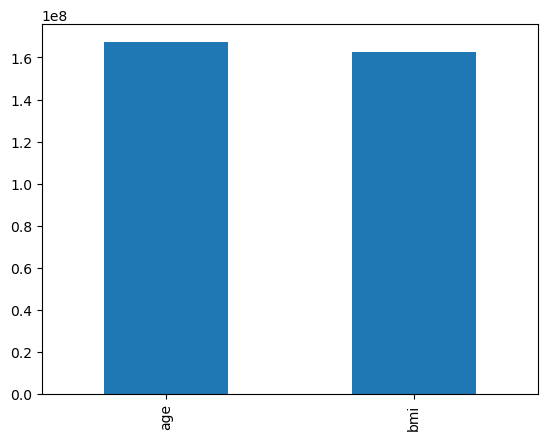

In [23]:
mse_values.sort_values(ascending=False).plot.bar() # Representing in Bar Chart

####  This method is not Used so much.